In [111]:
import torch
import clip
import seaborn as sns
import pandas as pd

from os import listdir
from PIL import Image
from tqdm import tqdm

from src.utils import format_results, ttest

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

### Orientation

#### Get files

In [82]:
df_sentences = pd.read_csv("data/muraki2021/items.csv")
df_sentences.head(5)

,sentence_a,object,sentence_b,image_a,image_b
0,The lumberjack left his axe sticking in the to...,axe,The lumberjack left his axe sticking in the si...,axeH.jpg,axeV.jpg
1,Derek swung his bat as the ball approached.,bat,Derek held his bat high as the ball approached.,batH.jpg,batV.jpg
2,The librarian put the book back on the table.,book,The librarian put the book back on the shelf.,bookH.jpg,bookV.jpg
3,"Jessica stuck the bottle in the wine rack, ant...",bottle,"Jessica stuck the bottle in the ice, anticipat...",bottleH.jpg,bottleV.jpg
4,James placed the bowl into an open space in th...,bowl,James placed the bowl into an open slot in the...,bowlH.jpg,bowlV.jpg


#### Run script

In [106]:
def format_sentences(obj, a_orientation, b_orientation):
    return ['It is a horizontal {x}'.format(x = obj),
           'It is a vertical {x}'.format(x=obj)]

In [107]:
all_results = []
for index, row in df_sentences.iterrows():
    
    a = row['image_a']
    b = row['image_b']
    obj = row['object']
    
    a_orientation = a.split(".")[0][-1]
    b_orientation = b.split(".")[0][-1]
    
    sentences = format_sentences(obj, a_orientation, b_orientation)
    text = clip.tokenize(sentences).to(device)
    
    print(sentences)
    
    image_paths = ["data/muraki2021/images/{path}".format(path=a),
                  "data/muraki2021/images/{path}".format(path=b)]
    
    image_inputs = [preprocess(Image.open(path)).unsqueeze(0).to(device) for path in image_paths]
                                                        
    with torch.no_grad():
        text_features = model.encode_text(text)
        image_features = [model.encode_image(img_input) for img_input in image_inputs]
        # Calculate the similarity
        probs = torch.softmax(
            text_features @ torch.stack(image_features).squeeze().T, dim=-1)
        
    
    all_results.append({
        'match_a': probs[0][0].item(),
        'mismatch_a': probs[0][1].item(),
        'match_b': probs[1][1].item(),
        'mismatch_b': probs[1][0].item(),
        'object': obj
    })

['It is a horizontal axe', 'It is a vertical axe']
['It is a horizontal bat', 'It is a vertical bat']
['It is a horizontal book', 'It is a vertical book']
['It is a horizontal bottle', 'It is a vertical bottle']
['It is a horizontal bowl', 'It is a vertical bowl']
['It is a horizontal broom', 'It is a vertical broom']
['It is a horizontal brush', 'It is a vertical brush']
['It is a horizontal crayon', 'It is a vertical crayon']
['It is a horizontal decoration', 'It is a vertical decoration']
['It is a horizontal flashlight', 'It is a vertical flashlight']
['It is a horizontal frxtinguisher', 'It is a vertical frxtinguisher']
['It is a horizontal glass', 'It is a vertical glass']
['It is a horizontal guitar', 'It is a vertical guitar']
['It is a horizontal gun', 'It is a vertical gun']
['It is a horizontal iron', 'It is a vertical iron']
['It is a horizontal key', 'It is a vertical key']
['It is a horizontal nail', 'It is a vertical nail']
['It is a horizontal pen', 'It is a vertical pe

In [108]:
df_results = pd.DataFrame(all_results)

In [112]:
df_new = format_results(df_results, "muraki2021", "muraki2021")
df_new.head(5)

,sentence,match,probability,model,dataset
0,a,match,0.114066,muraki2021,muraki2021
1,a,match,0.772773,muraki2021,muraki2021
2,a,match,0.220319,muraki2021,muraki2021
3,a,match,0.153105,muraki2021,muraki2021
4,a,match,0.997033,muraki2021,muraki2021


<AxesSubplot:xlabel='match', ylabel='probability'>

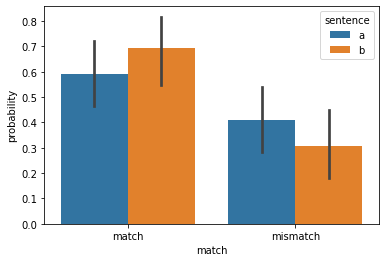

In [113]:
sns.barplot(data = df_new, x = "match", y = "probability", hue = "sentence")

In [115]:
ttest(df_new)

(4.099205685788463, 8.797531945651991e-05)

### Color

#### Get files

In [116]:
df_sentences = pd.read_csv("data/connell2007/items.csv")
df_sentences.head(2)

,item_id,object,sentence_a,sentence_b,image_a,image_b
0,1,steak,John looked at the steak on his plate,John looked at the steak in the butcher’s window,steak brown.jpg,steak red.jpg
1,2,traffic light,The driving instructor told Bob to stop at the...,The driving instructor told Bob to continue at...,traffic light red.jpg,traffic light green.jpg


#### Run script

In [117]:
def format_sentences(obj, color1, color2):
    return ['It is a {color} {x}'.format(color = color1, x = obj),
           'It is a {color} {x}'.format(color = color2, x=obj)]

In [118]:
all_results = []
for index, row in df_sentences.iterrows():
    
    a = row['image_a']
    b = row['image_b']
    obj = row['object']
    
    a_color = a.split(".")[0].split()[-1]
    b_color = b.split(".")[0].split()[-1]
    
    sentences = format_sentences(obj, a_color, b_color)
    text = clip.tokenize(sentences).to(device)
    
    image_paths = ["data/connell2007/images/{path}".format(path=a),
                  "data/connell2007/images/{path}".format(path=b)]
    
    image_inputs = [preprocess(Image.open(path)).unsqueeze(0).to(device) for path in image_paths]
                                                        
    with torch.no_grad():
        text_features = model.encode_text(text)
        image_features = [model.encode_image(img_input) for img_input in image_inputs]
        # Calculate the similarity
        probs = torch.softmax(
            text_features @ torch.stack(image_features).squeeze().T, dim=-1)
        
    
    all_results.append({
        'match_a': probs[0][0].item(),
        'mismatch_a': probs[0][1].item(),
        'match_b': probs[1][1].item(),
        'mismatch_b': probs[1][0].item(),
        'object': obj
    })

In [119]:
df_results = pd.DataFrame(all_results)

In [120]:
df_results

,match_a,mismatch_a,match_b,mismatch_b,object
0,0.932662,0.067338,0.984955,0.015045,steak
1,0.927666,0.072334,0.967150,0.032850,traffic light
2,0.991906,0.008094,0.932519,0.067481,tomato
3,0.996184,0.003816,0.751411,0.248589,tree
4,0.938749,0.061251,0.967931,0.032069,hair
5,0.942111,0.057889,0.987045,0.012955,bear
6,0.994818,0.005182,0.988242,0.011758,leaf
7,0.970506,0.029494,0.837469,0.162531,lamb
8,0.904417,0.095583,0.953011,0.046989,bananas
9,0.343515,0.656485,0.872099,0.127901,coffee


In [121]:
df_new = format_results(df_results, "connell2007", "connell2007")
df_new.head(5)

,sentence,match,probability,model,dataset
0,a,match,0.932662,connell2007,connell2007
1,a,match,0.927666,connell2007,connell2007
2,a,match,0.991906,connell2007,connell2007
3,a,match,0.996184,connell2007,connell2007
4,a,match,0.938749,connell2007,connell2007


<AxesSubplot:xlabel='match', ylabel='probability'>

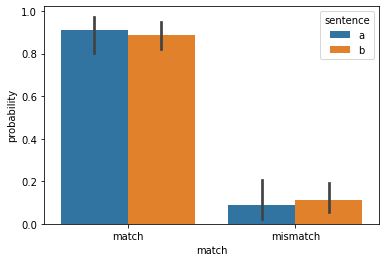

In [122]:
sns.barplot(data = df_new, x = "match", y = "probability", hue = "sentence")

In [123]:
ttest(df_new)

(18.382427511604934, 7.957013672649013e-23)